In [241]:
'''读取文件'''
import sdf_helper as sh
import numpy as np
import matplotlib.pyplot as plt
import os

# 设置全局字体为 Times New Roman 和字号
plt.rcParams.update({
    'font.family': 'Arial',
    'font.size': 20,
    'axes.labelsize': 20,
    'axes.titlesize': 20,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18,
    'legend.fontsize': 18,
    'mathtext.fontset': 'custom',
    'mathtext.rm': 'Arial',
    'mathtext.it': 'Arial:italic',
    'mathtext.bf': 'Arial:bold',
    'xtick.direction': 'in',  # X轴刻度向内
    'ytick.direction': 'in',  # Y轴刻度向内
})

In [41]:
'''读取文件'''
import sdf_helper as sh
import numpy as np
import matplotlib.pyplot as plt
import os

# 设定数据文件的路径和文件名模式
base_path = '/media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch/epoch3d/Cpf-Work/cone/cone1-a=145-3微米'
file_prefix = 'density'
file_suffix = '.sdf'
file_index = 18

file_name = f"{file_prefix}{file_index:04d}{file_suffix}"
file_path = os.path.join(base_path, file_name)

# 读取数据
den_crit = 0.17419597124e28
Density_Data = sh.getdata(file_path)
sh.list_variables(Density_Data)

ne = Density_Data.Derived_Number_Density_Photon.data  / den_crit
E = 1 #Density_Data.Derived_Average_Particle_Energy_Photon.data
ne = ne*E

x = Density_Data.Grid_Grid_mid.data[0] / (1e-6)# 归一化
y = Density_Data.Grid_Grid_mid.data[1] / (1e-6)
z = Density_Data.Grid_Grid_mid.data[2] / (1e-6)

# 切片
x_indices = slice(0, ne.shape[0])
x_values = x[x_indices]
y_indices = slice(0, ne.shape[1])
y_values = y[y_indices]
ne_slice = ne[x_indices, y_indices, 175]

'''检查范围'''
# ---- 找到 y 在 -2 到 2 微米对应的索引范围 ----
# y_min, z_min = -100, -100  # 单位：微米
# y_max, z_max = 100, 100
y_min, z_min = -1, -1  # 单位：微米
y_max, z_max = 1, 1

y_indices_range = np.where((y >= y_min) & (y <= y_max))[0]
y_start = y_indices_range[0]
y_end = y_indices_range[-1] + 1  # Python切片不包括结束索引（左闭右开）

z_indices_range = np.where((z >= z_min) & (z <= z_max))[0]
z_start = z_indices_range[0]
z_end = z_indices_range[-1] + 1  # Python切片不包括结束索引（左闭右开）

# ---- 对 y (选中范围) 和 z 求和 ----
ne_sum_partial_y = np.sum(ne[:, y_start:y_end, z_start:z_end], axis=(1, 2))  # 只在选定 y 区域和整个 z 上求和

Absorption_Fraction_of_Laser_Energy_Absorbed____ <class 'sdf.BlockConstant'> [1]
Absorption_Total_Laser_Energy_Injected__J_ <class 'sdf.BlockConstant'> [1]
CPUs_Current_rank <class 'sdf.BlockPlainVariable'> [0, 0, 0]
CPUs_Original_rank <class 'sdf.BlockPlainVariable'> [25,  2,  2]
Derived_Average_Particle_Energy_Electron <class 'sdf.BlockPlainVariable'> [2500,  350,  350]
Derived_Average_Particle_Energy_Ion_Al <class 'sdf.BlockPlainVariable'> [2500,  350,  350]
Derived_Average_Particle_Energy_Ion_H <class 'sdf.BlockPlainVariable'> [2500,  350,  350]
Derived_Average_Particle_Energy_Photon <class 'sdf.BlockPlainVariable'> [2500,  350,  350]
Derived_Average_Particle_Energy_ele_Al <class 'sdf.BlockPlainVariable'> [2500,  350,  350]
Derived_Average_Particle_Energy_positron <class 'sdf.BlockPlainVariable'> [2500,  350,  350]
Derived_Number_Density_Electron <class 'sdf.BlockPlainVariable'> [2500,  350,  350]
Derived_Number_Density_Ion_Al <class 'sdf.BlockPlainVariable'> [2500,  350,  350]
Der

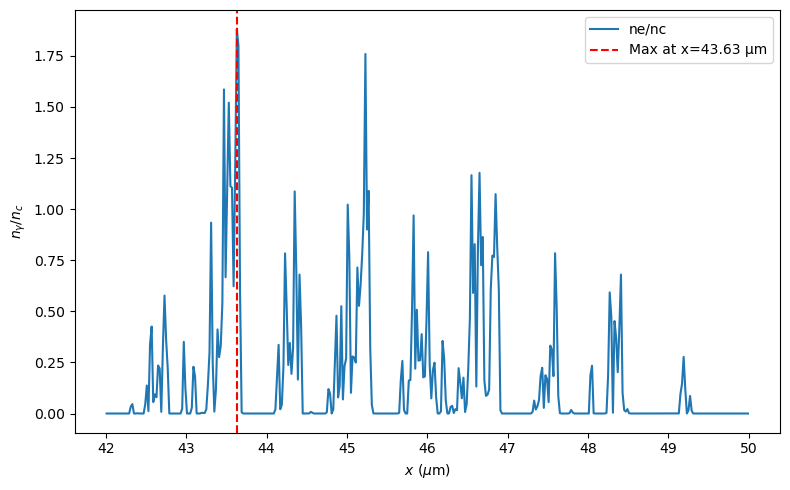

Max ne/nc = 1.880e+00 at x = 43.63 μm


In [ ]:
import sdf_helper as sh
import numpy as np
import matplotlib.pyplot as plt
import os

# ===== 文件路径设置 =====
base_path = '/media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch/epoch3d/Cpf-Work/cone/cone1-a=145-3微米'
file_index = 18
file_path = os.path.join(base_path, f'density{file_index:04d}.sdf')

# ===== 读取数据 =====
den_crit = 0.17419597124e28
data = sh.getdata(file_path)
ne = data.Derived_Number_Density_Photon.data / den_crit

x = data.Grid_Grid_mid.data[0] / 1e-6  # μm
y = data.Grid_Grid_mid.data[1] / 1e-6
z = data.Grid_Grid_mid.data[2] / 1e-6

# ===== 找到 y=0 和 z=0 最接近的位置索引 =====
y0_index = np.argmin(np.abs(y - 0))
z0_index = np.argmin(np.abs(z - 0))

# ===== 提取中轴线密度沿 x 的分布 =====
# ne_line = ne[:, y0_index, z0_index]
ne_line = ne[:, 175, 175]

# ===== 提取感兴趣 x 范围并找最大值 =====
x_min, x_max = 42, 50.3
x_mask = (x >= x_min) & (x <= x_max)
x_limited = x[x_mask]
ne_limited = ne_line[x_mask]

max_ne = np.max(ne_limited)
max_x = x_limited[np.argmax(ne_limited)]

# ===== 绘图 =====
plt.figure(figsize=(8, 5))
plt.plot(x_limited, ne_limited, label='ne/nc')
plt.axvline(max_x, color='r', linestyle='--', label=f'Max at x={max_x:.2f} μm')
plt.xlabel(r'$x\ (\mu\mathrm{m})$')
plt.ylabel(r'$n_\gamma/n_c$')
plt.legend()
plt.tight_layout()
plt.show()

# ===== 输出最大值信息 =====
print(f"Max ne/nc = {max_ne:.3e} at x = {max_x:.2f} μm")



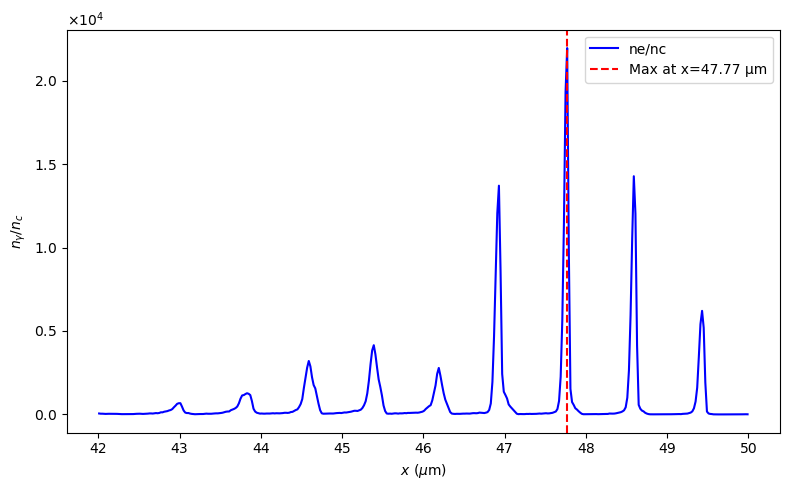

最大值 ne/nc = 2.196e+04，对应 x = 47.770 μm


In [20]:
import matplotlib.ticker as ticker
import numpy as np
import matplotlib.pyplot as plt

x_min, x_max = (42, 50.3)  # 设定 x 区间（单位：μm）
x_mask = (x_values >= x_min) & (x_values <= x_max)

x_values_limited = x_values[x_mask]
ne_limited = ne_sum_partial_y[x_mask]

# 获取最大值及其位置
max_ne = ne_limited.max()
max_index = np.argmax(ne_limited)
max_x = x_values_limited[max_index]

# ---- 绘图 ----
plt.figure(figsize=(8, 5))
plt.plot(x_values_limited, ne_limited, color='blue', label='ne/nc')
plt.axvline(max_x, color='red', linestyle='--', label=f'Max at x={max_x:.2f} μm')
plt.xlabel(r'$x\ (\mu\mathrm{m})$')
plt.ylabel(r'${n_\gamma}/{n_c}$')

# 设置 y 轴为科学记数法
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

plt.legend()
plt.tight_layout()
plt.show()

# 打印最大值及其位置
print(f"最大值 ne/nc = {max_ne:.3e}，对应 x = {max_x:.3f} μm")

FWHM = 0.0614
0.020473807140473827


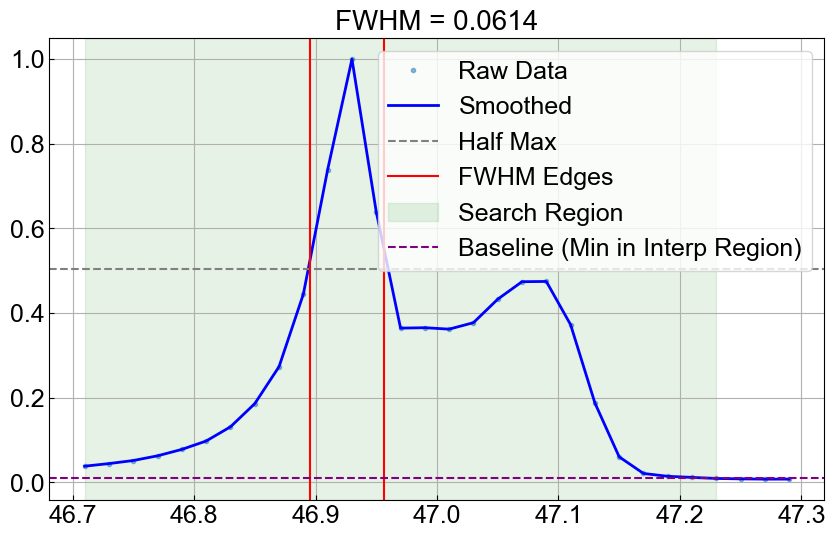

In [497]:
'''寻找半高宽'''
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.ndimage import gaussian_filter1d
from scipy.signal import find_peaks

x = x_values_limited
y = ne_limited/ne_limited.max()

# 平滑信号（可选）
y_smooth = gaussian_filter1d(y, sigma=0.01)

# 识别主峰（最高峰）
peaks, _ = find_peaks(y_smooth, height=0.2)  # 设置最小高度阈值
if len(peaks) == 0:
    raise ValueError("未检测到峰值")
main_peak_idx = peaks[np.argmax(y_smooth[peaks])]  # 选择最高峰
x_peak = x[main_peak_idx]
y_peak = y_smooth[main_peak_idx]

# 确定主峰附近的局部搜索区域
peak_val = y_peak * 0.01  # 主峰高度的1%作为阈值
left_bound = np.where(y_smooth[:main_peak_idx] < peak_val)[0]
left_bound = left_bound[-1] + 1 if left_bound.size > 0 else 0

right_bound = np.where(y_smooth[main_peak_idx:] < peak_val)[0]
right_bound = right_bound[0] + main_peak_idx if right_bound.size > 0 else len(x) - 1

# 确保边界合理
search_region = slice(max(0, left_bound), min(len(x), right_bound + 1))
x_local = x[search_region]
y_local = y_smooth[search_region]

# 在局部区域插值
f = interp1d(x_local, y_local, kind='cubic')
x_dense = np.linspace(x_local[0], x_local[-1], 1000)
y_dense = f(x_dense)

# # 计算半高位置
# y_half = y_peak / 2
# 计算底部值（例如局部区域最小值）
y_base = np.min(y_local)
# 修正的半高位置
y_half = (y_peak + y_base) / 2

# 在插值数据中找到主峰位置
peak_idx_dense = np.argmax(y_dense)
left_side = y_dense[:peak_idx_dense]
right_side = y_dense[peak_idx_dense:]

# 找到半高交点
left_cross_idx = np.where(left_side >= y_half)[0][0] if np.any(left_side >= y_half) else 0
right_cross_idx = np.where(right_side >= y_half)[0][-1] + peak_idx_dense if np.any(right_side >= y_half) else len(y_dense) - 1

left_cross = x_dense[left_cross_idx]
right_cross = x_dense[right_cross_idx]

fwhm = right_cross - left_cross
print(f"FWHM = {fwhm:.4f}")
print(fwhm/3)
# 可视化结果
plt.figure(figsize=(10, 6))
plt.plot(x, y, '.', alpha=0.5, label='Raw Data')
plt.plot(x, y_smooth, 'b-', label='Smoothed', linewidth=2)
plt.axhline(y_half, color='gray', linestyle='--', label='Half Max')
plt.axvline(left_cross, color='r', linestyle='-', label='FWHM Edges')
plt.axvline(right_cross, color='r', linestyle='-')
plt.axvspan(x_local[0], x_local[-1], alpha=0.1, color='green', label='Search Region')
plt.title(f"FWHM = {fwhm:.4f}")
# 绘制一条基线条
plt.axhline(y_base, color='purple', linestyle='--', label='Baseline (Min in Interp Region)')
plt.legend()
plt.grid(True)
plt.show()

区间 [42.5, 43.3] μm: 最大值 ne/nc = 3.953e+02, 对应 x = 42.730 μm
区间 [43.3, 44.2] μm: 最大值 ne/nc = 2.250e+03, 对应 x = 43.590 μm
区间 [44.2, 44.9] μm: 最大值 ne/nc = 1.478e+03, 对应 x = 44.430 μm
区间 [44.9, 45.9] μm: 最大值 ne/nc = 5.475e+03, 对应 x = 45.270 μm
区间 [45.9, 46.7] μm: 最大值 ne/nc = 2.932e+03, 对应 x = 46.090 μm
区间 [46.7, 47.3] μm: 最大值 ne/nc = 4.275e+03, 对应 x = 46.910 μm
区间 [47.3, 48.3] μm: 最大值 ne/nc = 2.211e+03, 对应 x = 47.670 μm
区间 [48.3, 49.1] μm: 最大值 ne/nc = 1.135e+03, 对应 x = 48.550 μm
区间 [49.1, 50] μm: 最大值 ne/nc = 2.365e+02, 对应 x = 49.350 μm


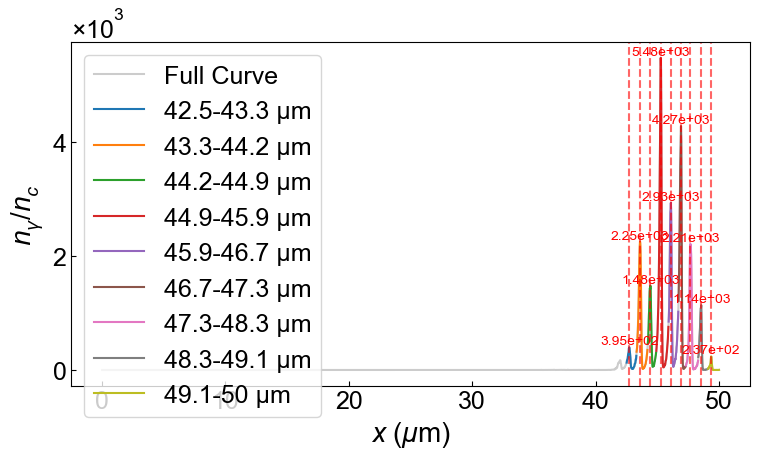

In [ ]:
# 找到每个区间的最大值
import matplotlib.ticker as ticker
import numpy as np
import matplotlib.pyplot as plt

'''读取文件'''
import sdf_helper as sh
import numpy as np
import matplotlib.pyplot as plt
import os

# 设定数据文件的路径和文件名模式
base_path = '/media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch/epoch3d/Cpf-Work/cone/cone1-a=145-3微米'
file_prefix = 'density'
file_suffix = '.sdf'
file_index = 18

file_name = f"{file_prefix}{file_index:04d}{file_suffix}"
file_path = os.path.join(base_path, file_name)

# 读取数据
den_crit = 0.17419597124e28
Density_Data = sh.getdata(file_path)
sh.list_variables(Density_Data)

ne = Density_Data.Derived_Number_Density_Photon.data  / den_crit
E = 1 #Density_Data.Derived_Average_Particle_Energy_Photon.data
ne = ne*E

x = Density_Data.Grid_Grid_mid.data[0] / (1e-6)# 归一化
y = Density_Data.Grid_Grid_mid.data[1] / (1e-6)
z = Density_Data.Grid_Grid_mid.data[2] / (1e-6)

# 切片
x_indices = slice(0, ne.shape[0])
x_values = x[x_indices]
y_indices = slice(0, ne.shape[1])
y_values = y[y_indices]
ne_slice = ne[x_indices, y_indices, 175]

'''检查范围'''
# ---- 找到 y 在 -2 到 2 微米对应的索引范围 ----
# y_min, z_min = -100, -100  # 单位：微米
# y_max, z_max = 100, 100
y_min, z_min = -1, -1  # 单位：微米
y_max, z_max = 1, 1

y_indices_range = np.where((y >= y_min) & (y <= y_max))[0]
y_start = y_indices_range[0]
y_end = y_indices_range[-1] + 1  # Python切片不包括结束索引（左闭右开）

z_indices_range = np.where((z >= z_min) & (z <= z_max))[0]
z_start = z_indices_range[0]
z_end = z_indices_range[-1] + 1  # Python切片不包括结束索引（左闭右开）

# ---- 对 y (选中范围) 和 z 求和 ----
ne_sum_partial_y = np.sum(ne[:, y_start:y_end, z_start:z_end], axis=(1, 2))  # 只在选定 y 区域和整个 z 上求和

# ---- 参数设置 ----
r_max = 0.5  # 半径上限，单位：微米

# 生成二维网格坐标（单位：微米）
Y, Z = np.meshgrid(y, z, indexing='ij')
R_squared = Y**2 + Z**2

# ---- 创建圆形掩膜 ----
circular_mask = R_squared < r_max**2  # 布尔数组，形状为 (len(y), len(z))

# ---- 对每一个 x 截面，提取该圆形区域的ne并求和 ----
# 需要将 circular_mask 扩展到 3D，与 ne 的形状对齐
# ne.shape = (len(x), len(y), len(z))
ne_sum_circular = np.array([
    np.sum(ne[i][circular_mask]) for i in range(ne.shape[0])
])

# 多个 x 范围区间（单位：μm）
# x_ranges = [(42, 43.3), (43.3, 44.1), (44.1, 44.9),(44.9,45.7),(45.7,46.5),(46.5,47.3),(47.3,48.3),(48.3,49.3),(49.3,50)] #0.5
# x_ranges = [(42.5, 43.3), (43.3, 44.1), (44.1, 44.9),(44.9,45.7),(45.7,46.5),(46.5,47.3),(47.3,48.3),(48.3,49.3),(49.3,50)] #1
# x_ranges = [(42.5, 43.3), (43.3, 44.2), (44.2, 44.8),(44.8,45.7),(45.7,46.5),(46.5,47.3),(47.3,48.2),(48.2,49),(49,50)] #0.75
# x_ranges = [(42.5, 43.3), (43.3, 44.1), (44.1, 44.9),(44.9,45.7),(45.7,46.7),(46.7,47.3),(47.3,48.3),(48.3,49.3),(49.3,50)] #1.5，2
# x_ranges = [(42.5, 43.3), (43.3, 44.1), (44.1, 44.9),(44.9,45.7),(45.7,46.5),(46.5,47.5),(47.5,48.3),(48.3,48.9),(48.9,50)] #2.5
x_ranges = [(42.5, 43.3), (43.3, 44.2), (44.2, 44.9),(44.9,45.9),(45.9,46.7),(46.7,47.3),(47.3,48.3),(48.3,49.1),(49.1,50)] #3

# 设置图像
plt.figure(figsize=(8, 5))

# 画全局的曲线
plt.plot(x_values, ne_sum_partial_y, color='gray', alpha=0.4, label='Full Curve')

# 遍历每个区间
for x_min, x_max in x_ranges:
    mask = (x_values >= x_min) & (x_values <= x_max)
    x_limited = x_values[mask]
    ne_limited = ne_sum_partial_y[mask]

    if len(ne_limited) == 0:
        continue  # 防止空数组报错

    max_ne = ne_limited.max()
    max_index = np.argmax(ne_limited)
    max_x = x_limited[max_index]

    # 绘制该区间内的曲线和峰值
    plt.plot(x_limited, ne_limited, label=f'{x_min}-{x_max} μm')
    plt.axvline(max_x, linestyle='--', color='red', alpha=0.6)
    plt.text(max_x, max_ne, f'{max_ne:.2e}', fontsize=10, ha='center', va='bottom', color='red')

    print(f"区间 [{x_min}, {x_max}] μm: 最大值 ne/nc = {max_ne:.3e}, 对应 x = {max_x:.3f} μm")

# 设置坐标轴标签
plt.xlabel(r'$x\ (\mu\mathrm{m})$')
plt.ylabel(r'${n_\gamma}/{n_c}$')

# 设置 y 轴为科学记数法
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

plt.legend()
plt.tight_layout()
plt.show()


Reading file /media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch/epoch3d/Cpf-Work/cone/cone1-a=145-0.75微米/density0018.sdf
t() = time
x(2501, 351, 351) = grid
y(2501, 351, 351) = grid
z(2501, 351, 351) = grid
xc(2500, 350, 350) = grid_mid
yc(2500, 350, 350) = grid_mid
zc(2500, 350, 350) = grid_mid


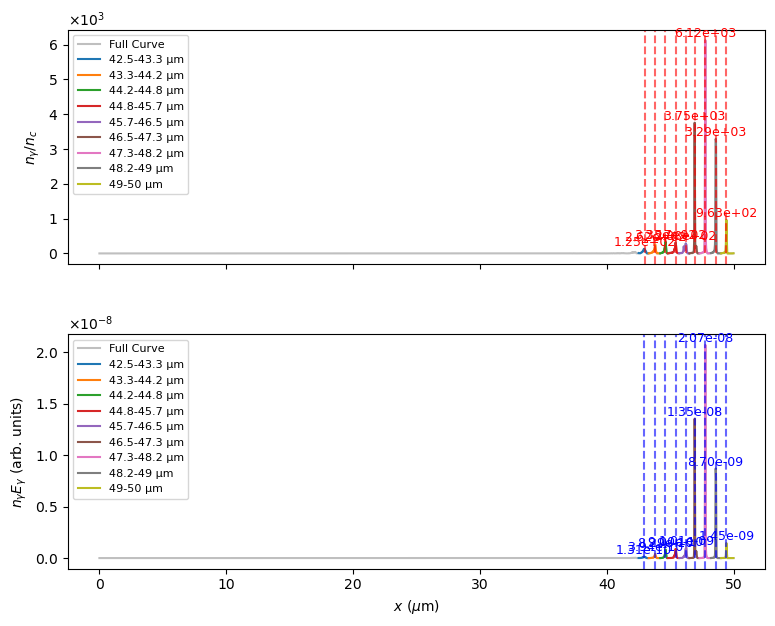

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import sdf_helper as sh
import csv

# ----------- 文件路径和读取参数设置 -----------
base_path = '/media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch/epoch3d/Cpf-Work/cone/cone1-a=145-0.75微米'
file_prefix = 'density'
file_suffix = '.sdf'
file_index = 18
den_crit = 0.17419597124e28

file_name = f"{file_prefix}{file_index:04d}{file_suffix}"
file_path = os.path.join(base_path, file_name)
data = sh.getdata(file_path)

ne = data.Derived_Number_Density_Photon.data / den_crit
ne_e = data.Derived_Number_Density_Photon.data 
E = data.Derived_Average_Particle_Energy_Photon.data
nE = ne_e * E

x = data.Grid_Grid_mid.data[0] / 1e-6
y = data.Grid_Grid_mid.data[1] / 1e-6
z = data.Grid_Grid_mid.data[2] / 1e-6

# ----------- 创建圆形掩膜（r < 0.5 μm） -----------
Y, Z = np.meshgrid(y, z, indexing='ij')
R2 = Y**2 + Z**2
circular_mask = R2 < 0.5**2

# ----------- 积分（对 y-z 平面上圆形区域） -----------
ne_sum_circular = np.array([np.sum(ne[i][circular_mask]) for i in range(ne.shape[0])])
nE_sum_circular = np.array([np.sum(nE[i][circular_mask]) for i in range(ne.shape[0])])

# ----------- 设置 x 区间列表 -----------
# x_ranges = [(42, 43.3), (43.3, 44.1), (44.1, 44.9),(44.9,45.7),(45.7,46.5),
#             (46.5,47.3),(47.3,48.3),(48.3,49.3),(49.3,50)] #0.5

x_ranges = [(42.5, 43.3), (43.3, 44.2), (44.2, 44.8),(44.8,45.7),
(45.7,46.5),(46.5,47.3),(47.3,48.2),(48.2,49),(49,50)] #0.75

# x_ranges = [(42.5, 43.3), (43.3, 44.1), (44.1, 44.9),(44.9,45.7),(45.7,46.5),
# (46.5,47.3),(47.3,48.3),(48.3,49.3),(49.3,50)] #1

# x_ranges = [(42.5, 43.3), (43.3, 44.1), (44.1, 44.9),(44.9,45.7),(45.7,46.7),
#             (46.7,47.3),(47.3,48.3),(48.3,49.3),(49.3,50)] #1.5，2

# x_ranges = [(42.5, 43.3), (43.3, 44.1), (44.1, 44.9),(44.9,45.7),
# (45.7,46.5),(46.5,47.5),(47.5,48.3),(48.3,48.9),(48.9,50)] #2.5

# x_ranges = [(42.5, 43.3), (43.3, 44.2), (44.2, 44.9),(44.9,45.9),
#             (45.9,46.7),(46.7,47.3),(47.3,48.3),(48.3,49.1),(49.1,50)] #3

# ----------- 创建图形与子图 -----------
fig, axes = plt.subplots(2, 1, figsize=(9, 7), sharex=True)
plt.subplots_adjust(hspace=0.3)


output_dir = '/media/lan/Lexar/EPOCH代码/program1——cone代码'   # 你想保存到其它文件夹，比如 /media/lan/output_csv/
os.makedirs(output_dir, exist_ok=True) # 如果目录不存在，可以先创建
csv_path = os.path.join(output_dir, f'0.75density_energy_peaks_{file_index:04d}.csv') # 新的 CSV 文件完整路径

# 然后写文件
with open(csv_path, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['x_min', 'x_max', 'x_peak_ne', 'ne_max', 'x_peak_nE', 'nE_max'])

    # ----------- 第一个子图：光子数密度积分 -----------
    ax1 = axes[0]
    ax1.plot(x, ne_sum_circular, color='gray', alpha=0.5, label='Full Curve')

    # ----------- 第二个子图：能量密度积分 -----------
    ax2 = axes[1]
    ax2.plot(x, nE_sum_circular, color='gray', alpha=0.5, label='Full Curve')

    for x_min, x_max in x_ranges:
        mask = (x >= x_min) & (x <= x_max)
        x_limited = x[mask]

        ne_limited = ne_sum_circular[mask]
        nE_limited = nE_sum_circular[mask]

        max_ne = ne_limited.max()
        max_x_ne = x_limited[np.argmax(ne_limited)]
        max_nE = nE_limited.max()
        max_x_nE = x_limited[np.argmax(nE_limited)]

        ax1.plot(x_limited, ne_limited, label=f'{x_min}-{x_max} μm')
        ax1.axvline(max_x_ne, linestyle='--', color='red', alpha=0.6)
        ax1.text(max_x_ne, max_ne, f'{max_ne:.2e}', fontsize=9, ha='center', va='bottom', color='red')

        ax2.plot(x_limited, nE_limited, label=f'{x_min}-{x_max} μm')
        ax2.axvline(max_x_nE, linestyle='--', color='blue', alpha=0.6)
        ax2.text(max_x_nE, max_nE, f'{max_nE:.2e}', fontsize=9, ha='center', va='bottom', color='blue')

        # 写入 CSV 行
        writer.writerow([x_min, x_max, max_x_ne, max_ne, max_x_nE, max_nE])

# ----------- 图像格式设置 -----------
ax1.set_ylabel(r'$n_\gamma/n_c$')
ax1.legend(fontsize=8)
ax1.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

ax2.set_xlabel(r'$x\ (\mu\mathrm{m})$')
ax2.set_ylabel(r'$n_\gamma E_\gamma$ (arb. units)')
ax2.legend(fontsize=8)
ax2.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# ----------- 保存 PDF 图像 -----------
# pdf_path = os.path.join(base_path, f'density_energy_sum_{file_index:04d}.pdf')
# plt.savefig(pdf_path)
plt.show()
